In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
#import os
import re
import nltk
#import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')


def remove_punct(text):
    """
    Remove all punctuation, special characters including '?', '!', and extra spaces from the text 
    while keeping letters and numbers, and return the cleaned text.
    """
    # Supprimer la ponctuation et les caractères spéciaux
    cleaned_text = re.sub(r'[?|!|\'|"|#]', '', text)
    # Supprimer tout ce qui n'est pas une lettre, un nombre, ou un espace
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', cleaned_text)
    # Remplacer les espaces multiples par un seul espace
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    # Convertir en minuscules pour standardiser le texte
    return cleaned_text.lower().strip()

def get_sentences(df, text_col, target_col):
    sentences = []
    for row in df.itertuples():
        # Tokenisation du texte en phrases et nettoyage préliminaire
        text = nltk.sent_tokenize(getattr(row, text_col).strip().lower())
        level = getattr(row, target_col)
        doc_id = getattr(row, 'Index')
        for sentence in text:
            # Nettoyage approfondi de chaque phrase pour éliminer la ponctuation et les caractères spéciaux
            cleaned_sentence = remove_punct(sentence)
            words = cleaned_sentence.split()
            avg_word_length = np.mean([len(word) for word in words]) if words else 0
            sentences.append((cleaned_sentence, len(words), round(avg_word_length, 2), level, doc_id))
    
    return sentences


train_data = get_sentences(train_data, 'text', 'level')
# Break the Data Frame into pieces sentence-wise
df = pd.DataFrame.from_records(train_data, columns=['text', 'num_of_words', 'avg_len_words', 'level', 'doc_id'])
display(df)

def clean_dataframe(df):
    # Vérification et affichage du nombre de doublons
    duplicate_rows = df.duplicated()
    num_duplicates = duplicate_rows.sum()
    print(f"Nombre de doublons : {num_duplicates}")
    if num_duplicates > 0:
        print("Doublons :")
        display(df[duplicate_rows])
    
    # Suppression des doublons
    df_cleaned = df.drop_duplicates()
    
    # Vérification et affichage du nombre de valeurs manquantes ou de textes vides
    missing_or_empty = df_cleaned.isnull() | (df_cleaned == "")
    num_missing_or_empty = missing_or_empty.sum().sum()
    print(f"Nombre de valeurs manquantes ou de textes vides : {num_missing_or_empty}")
    
    # Suppression des lignes avec des valeurs manquantes ou des textes vides
    # Remarque : cette opération dépend de la structure de votre DataFrame et de quelles colonnes vous souhaitez vérifier
    df_final = df_cleaned.dropna().replace("", np.nan).dropna()
    
    return df_final

# Application de la fonction sur un exemple de DataFrame
# Remplacez `your_dataframe` par le nom de votre DataFrame
df = clean_dataframe(df)
print("DataFrame après nettoyage :")
display(df.sort_values(by='num_of_words'))



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yanivbenichou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yanivbenichou/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yanivbenichou/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,num_of_words,avg_len_words,level,doc_id
0,my friend meg was going out to work like every...,11,3.64,3,0
1,when she was approaching the corner at elm and...,28,4.25,3,0
2,meg decided to go over to them to see if she c...,16,3.25,3,0
3,suddenly the young woman came at her waving a gun,10,4.00,3,0
4,she pushed the gun into her stomach and starte...,21,4.62,3,0
...,...,...,...,...,...
114693,i get up at eight,5,2.60,0,20444
114694,at ten oclock i go sport for my childrens,9,3.67,0,20444
114695,at one oclock i have lunch on the fastfood,9,3.78,0,20444
114696,in afternoon i play with my childrens,7,4.43,0,20444


Nombre de doublons : 127
Doublons :


,text,num_of_words,avg_len_words,level,doc_id
284,,0,0.0,2,54
3328,,0,0.0,1,579
6451,,0,0.0,1,1142
6626,,0,0.0,2,1172
6628,,0,0.0,2,1172
...,...,...,...,...,...
111928,,0,0.0,3,19954
113394,,0,0.0,0,20221
113756,to from subject networking event,5,5.6,1,20288
114312,,0,0.0,3,20382


Nombre de valeurs manquantes ou de textes vides : 323
DataFrame après nettoyage :


,text,num_of_words,avg_len_words,level,doc_id
18482,bye,1,3.00,1,3281
89840,hi,1,2.00,0,16019
101420,hi,1,2.00,0,18091
13210,hi,1,2.00,0,2316
71041,christine,1,9.00,0,12714
...,...,...,...,...,...
38545,mr john smithi write you this letter for sugge...,153,5.13,4,6879
29347,dear sebastianregarding your convincing apply ...,160,4.89,4,5231
28253,carson county need you on monday our county ha...,183,4.72,4,5037
105297,property 1 cottage 200000 wonderful viewnot qu...,199,4.55,3,18777


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

from joblib import dump, load
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Séparation des caractéristiques et de la cible
X = df['text']  # Caractéristiques : textes
y = df['level']  # Cible : niveaux

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer un vectorisateur
vectorizer = CountVectorizer()

# Appliquer CountVectorizer au texte lemmatisé
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Initialiser le transformateur TF-IDF
tfidf_transformer = TfidfTransformer()

# Appliquer la transformation TF-IDF
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [22]:
# Entraînement du modèle SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = svm_model.predict(X_test_tfidf)


Accuracy: 0.7474252370532458


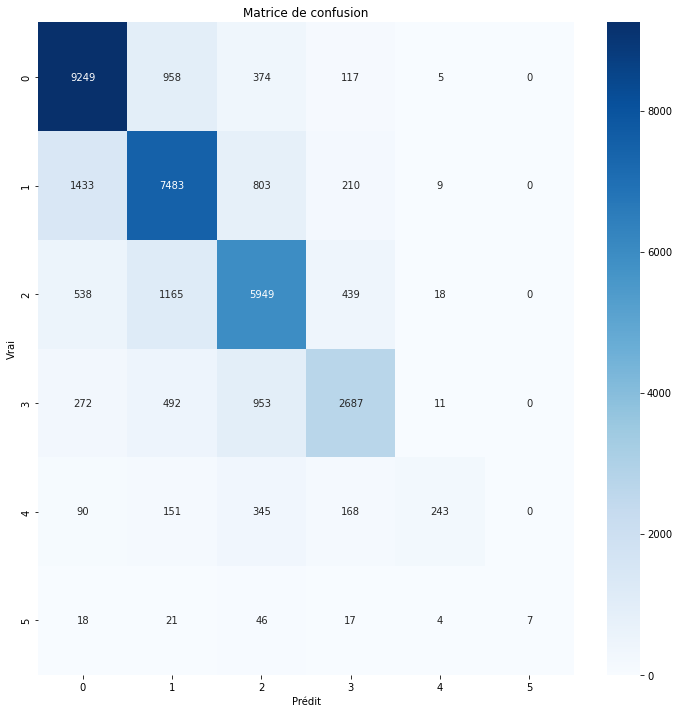

              precision    recall  f1-score   support

           0       0.80      0.86      0.83     10703
           1       0.73      0.75      0.74      9938
           2       0.70      0.73      0.72      8109
           3       0.74      0.61      0.67      4415
           4       0.84      0.24      0.38       997
           5       1.00      0.06      0.12       113

    accuracy                           0.75     34275
   macro avg       0.80      0.54      0.57     34275
weighted avg       0.75      0.75      0.74     34275



In [23]:
# Évaluation de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# Créer et afficher la matrice de confusion
mat_conf = pd.crosstab(y_test, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(mat_conf, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.show()
print(classification_report(y_test, y_pred))


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups # Exemple de dataset
from sklearn.model_selection import train_test_split

# Séparation des caractéristiques et de la cible
X = df['text']  # Caractéristiques : textes
y = df['level']  # Cible : niveaux

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Configuration du pipeline de traitement
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC())
])

# Paramètres pour GridSearch
parameters = {
    'tfidf__max_df': (0.5, 0.75, 1.0),
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf']
}

# Configuration et exécution du GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et de la meilleure score
print("Meilleurs paramètres trouvés :")
print(grid_search.best_params_)
print("Meilleure score (accuracy) :")
print(grid_search.best_score_)

# Optionnel : Évaluation sur l'ensemble de test
from sklearn.metrics import accuracy_score
y_pred = grid_search.predict(X_test)
print("Accuracy sur l'ensemble de test :", accuracy_score(y_test, y_pred))

AttributeError: select_dtypes not found

# CBOW

In [28]:
import pandas as pd
import numpy as np

from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

from joblib import dump, load

# Tokenisation de chaque phrase
X_train["Tokenized"] = X_train.apply(word_tokenize)
X_test["Tokenized"] = X_test.apply(word_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yanivbenichou/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
# Vectorisation CBOW
model_cbow = Word2Vec(sentences = X_train['Tokenized'].tolist(), vector_size = 100, window = 5, min_count = 1, sg = 0)
# Conversion des textes en vecteurs
def document_vector(doc):
    # Supprimer les mots qui ne sont pas dans le modèle
    doc = [word for word in doc if word in model_cbow.wv.key_to_index]
    return np.mean(model_cbow.wv[doc], axis=0) if doc else np.zeros(model_cbow.vector_size)

X_train_vectors = X_train['Tokenized'].apply(document_vector)
X_test_vectors = X_test['Tokenized'].apply(document_vector)
X_train_vectors.head()

25840     [-0.85489815, 0.95006824, 0.76826197, 0.506966...
42375     [-0.6114221, 0.8152699, -0.264039, -0.04268171...
32200     [-0.41596052, 0.8400086, -0.48508096, 0.785226...
106101    [-0.20077689, 0.3108325, 0.50150114, 0.9425487...
9635      [-0.3820445, 0.5588292, 0.15672597, -0.2019977...
Name: text, dtype: object

In [31]:
# X_train doit être un tableau numpy bidimensionnel
X_train_array = np.vstack(X_train_vectors)
# Création du modèle SVM avec des paramètres par défaut
model_svm = SVC()

# Entraînement du modèle avec les données d'entraînement
model_svm.fit(X_train_array, y_train)
# X_test doit être un tableau numpy bidimensionnel
X_test_array = np.vstack(X_test_vectors)
# Faire des prédictions sur l'ensemble de test
y_pred_svm = model_svm.predict(np.array(X_test_vectors.tolist()))

Accuracy: 0.7474252370532458


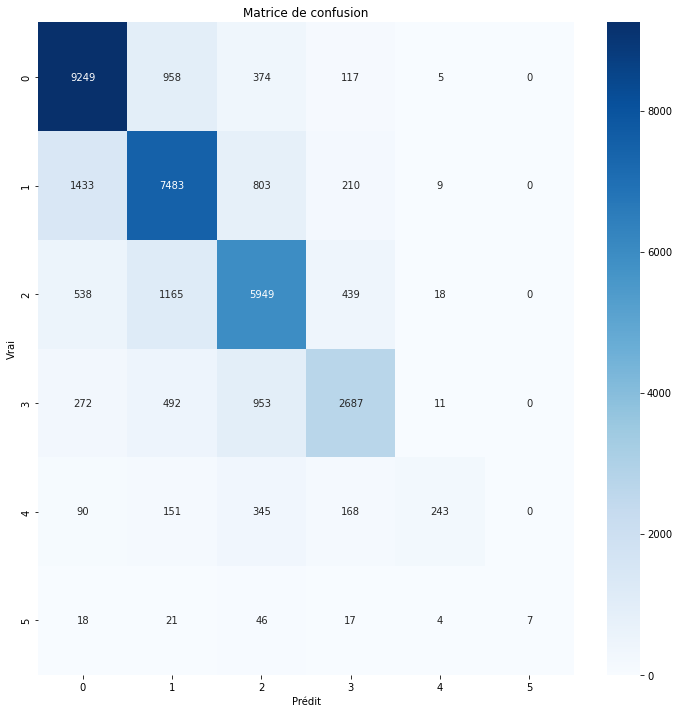

              precision    recall  f1-score   support

           0       0.80      0.86      0.83     10703
           1       0.73      0.75      0.74      9938
           2       0.70      0.73      0.72      8109
           3       0.74      0.61      0.67      4415
           4       0.84      0.24      0.38       997
           5       1.00      0.06      0.12       113

    accuracy                           0.75     34275
   macro avg       0.80      0.54      0.57     34275
weighted avg       0.75      0.75      0.74     34275



In [32]:
# Évaluation de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# Créer et afficher la matrice de confusion
mat_conf = pd.crosstab(y_test, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(mat_conf, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.show()
print(classification_report(y_test, y_pred))
